In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import numpy as np
import random as random

#Задача 1
Примените алгоритм Metropolis для генерации выборки из распределения с плотностью p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

In [2]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

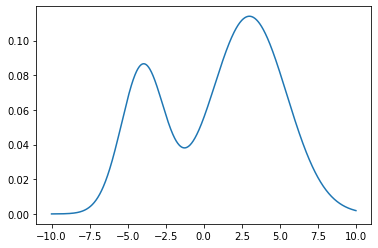

In [3]:
from scipy.stats import norm
x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

plt.plot(x, y)
plt.show()

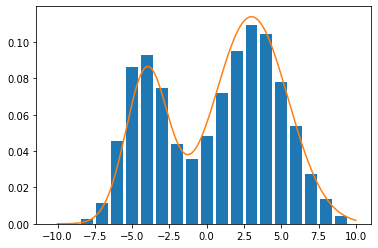

In [4]:
from scipy.stats import norm
value = lambda x: 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
proposal = lambda x: (x + np.random.choice([-1, 1])+10) % 20 - 10
post = metroplis(1, value, proposal, 10000)

plt.hist(post, bins=np.arange(21)-10.5, rwidth=0.8, density=True)
x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
plt.plot(x, y)
plt.show()

# Задача 2
Рассмотрим граф G=(V,E), вершинам которого случайным образом приписаны значения 0 и 1 так, что смежные вершины не могут одновременно иметь значение 1.
Оценить:  En(ξ) для графа 10х10;    Построить график распределеиня n(ξ)

In [27]:
def plot_grid(arr):
    if arr.dtype != 'bool':
        raise ValueError('arr should be a boolean ndarray')
    colors = np.empty(arr.shape, dtype='U5')
    colors[:] = 'red'
    colors[arr] = 'blue'
    x, y = np.indices((arr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

In [20]:
def metropolis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [0]
    for i in range(niter):
        index = np.random.choice(8,2)
        proposed = proposal(current, index, **kwargs)
        p = value(current, **kwargs)
        p /= value(proposed, **kwargs)
        if np.random.uniform() > p:
            current = proposed
        else:
            current[index[0]][index[1]] = 0;
        post.append(round(np.sum(current)))
    return post[nburn:], current

In [24]:
def value(current, **kwargs):
    _ = kwargs
    return current.sum()

def proposal(current, index, size=10, **kwargs):
    _ = kwargs
    index = np.random.choice(size, 2)
    
    s=0
    if index[0]!=0:
        s+=current[index[0]-1][index[1]]
    if index[0]!=size - 1:
        s+=current[index[0]+1][index[1]]
    if index[1]!=0:
        s+=current[index[0]][index[1]-1]
    if index[1]!=size - 1:
        s+=current[index[0]][index[1]+1]
    
    if s==0:
        current[index[0]][index[1]] = 1
    else:
        current[index[0]][index[1]] = 0
    return current

In [25]:
size = 10
post, graph = metropolis(np.zeros((size, size)), value, proposal, 20000)

In [31]:
print("Оценка числа закрашенных вершин в графе 10x10: ")
print(np.sum(post)/len(post))

Оценка числа закрашенных вершин в графе 10x10: 
24.656567171641417


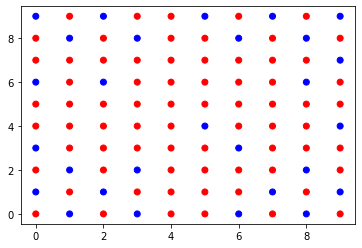

In [29]:
plot_grid(current.astype('bool'))

График распределения числа синих вершин:

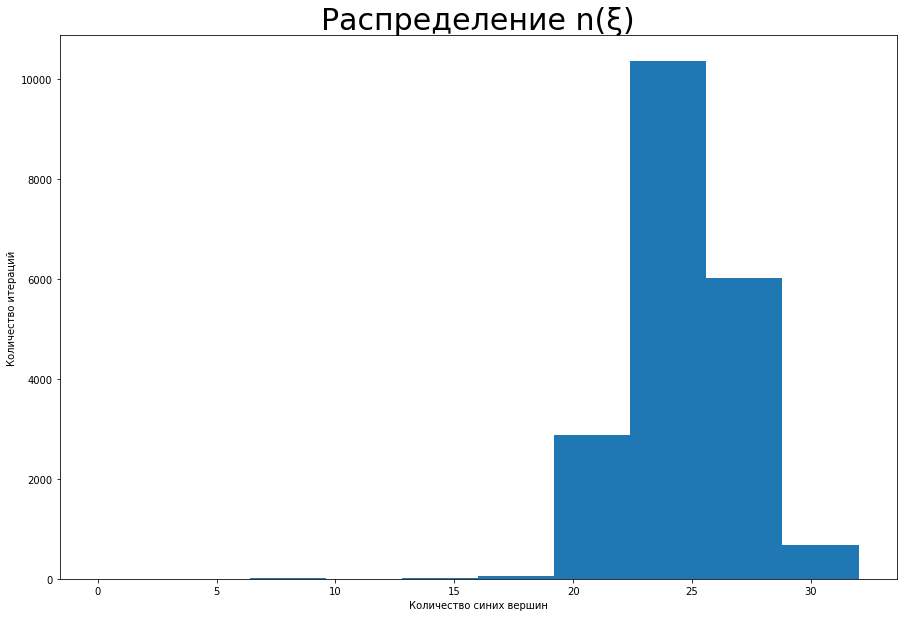

In [30]:
plt.figure(figsize=(15,10))
plt.hist(post)
plt.title("Распределение n(ξ)", size = 30)
plt.xlabel("Количество синих вершин")
plt.ylabel("Количество итераций")
plt.show()